In [ ]:
import numpy as np
import pandas  as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [ ]:
df.drop('id' , axis =  1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stop words
stopwords = stopwords.words('english')

def process_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Remove single alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing digits
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    # Remove stop words and lemmatize the words
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens if word not in stopwords]
    return ' '.join(tokens)

df['tokens'] = df['comment_text'].apply(process_text)

In [ ]:
print(df['tokens'])

0         explanation edit make username hardcore metall...
1         daww match background colour im seemingly stic...
2         hey man im really try edit war guy constantly ...
3         cant make real suggestions improvement wonder ...
4                       sir hero chance remember page thats
                                ...                        
159566    second time ask view completely contradict cov...
159567                 ashamed horrible thing put talk page
159568    spitzer umm theres actual article prostitution...
159569    look like actually put speedy first version de...
159570    really dont think understand come idea bad rig...
Name: tokens, Length: 159571, dtype: object


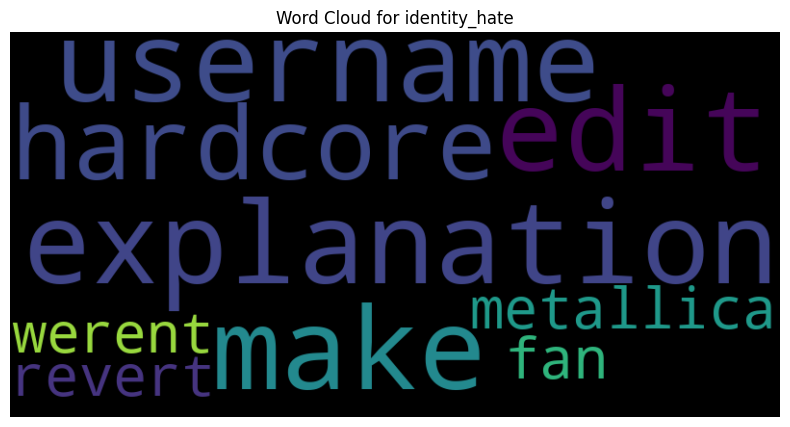

In [ ]:
def process_text1(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Remove single alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing digits
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    # Remove stop words and lemmatize the words
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens if word not in stopwords]
    return ' '.join(tokens)

text = "Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't ..."
text = process_text1(text)


wordcloud = WordCloud(width=800, height=400, background_color='black')

# Generate a word cloud
wordcloud.generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for {column}')
plt.axis("off")
plt.show()



In [ ]:
top_words_threat = {}

# Generate word cloud and store top words for 'threat' column
df_threat = df[df['threat'] == 1]
text_threat = ' '.join(df_threat['tokens'])


wordcloud_threat = WordCloud(width=800, height=400, background_color='black')
wordcloud_threat.generate(text_threat)
word_frequencies_threat = wordcloud_threat.words_
sorted_word_frequencies_threat = sorted(word_frequencies_threat.items(), key=lambda x: x[1], reverse=True)
top_words_threat = dict(sorted_word_frequencies_threat[:50])

top_words_identity_hate = {}

# Generate word cloud and store top words for 'identity_hate' column
df_identity_hate = df[df['identity_hate'] == 1]
text_identity_hate = ' '.join(df_identity_hate['tokens'])
wordcloud_identity_hate = WordCloud(width=800, height=400, background_color='black')
wordcloud_identity_hate.generate(text_identity_hate)
word_frequencies_identity_hate = wordcloud_identity_hate.words_
sorted_word_frequencies_identity_hate = sorted(word_frequencies_identity_hate.items(), key=lambda x: x[1], reverse=True)
top_words_identity_hate = dict(sorted_word_frequencies_identity_hate[:50])


In [ ]:
import random

rows_to_update = df[df["threat"] == 0]

# Randomly select 10 words from each dictionary
random_words_threat = random.sample(list(top_words_threat.keys()), 10)
random_words_identity_hate = random.sample(list(top_words_identity_hate.keys()), 10)
print(random_words_threat)
print(random_words_identity_hate)

['ban kill', 'youre', 'kill block', 'steal password', 'die wikipedia', 'edie die', 'forever dont', 'wikipedia die', 'jim wale', 'die di']
['die die', 'want', 'drink bleachanhero', 'nigger stupid', 'niggas fuck', 'eat shit', 'know', 'suck mexicans', 'bunksteve gay', 'cunt cunt']


In [ ]:
rows_to_update = rows_to_update.sample(n=2000)

# Iterate over selected rows and update them
for index, row in rows_to_update.iterrows():
    # Randomly select 10 words from each dictionary
    random_words_threat = random.sample(list(top_words_threat.keys()), 10)

    tokens = row["tokens"]
    tokens += " " + " ".join(random_words_threat)

    # Update the row in the DataFrame
    df.at[index, "tokens"] = tokens
    df.at[index, "threat"] = 1

In [ ]:
rows_to_update = rows_to_update.sample(n=2000)  # Select 10 random rows

for index, row in rows_to_update.iterrows():
    # Randomly select 10 words from each dictionary
    random_words_identity_hate = random.sample(list(top_words_identity_hate.keys()), 10)

    # Concatenate the random words with existing tokens
    tokens = row["tokens"]
    tokens += " " + " ".join(random_words_identity_hate)

    # Update the row in the DataFrame
    df.at[index, "tokens"] = tokens
    df.at[index, "identity_hate"] = 1

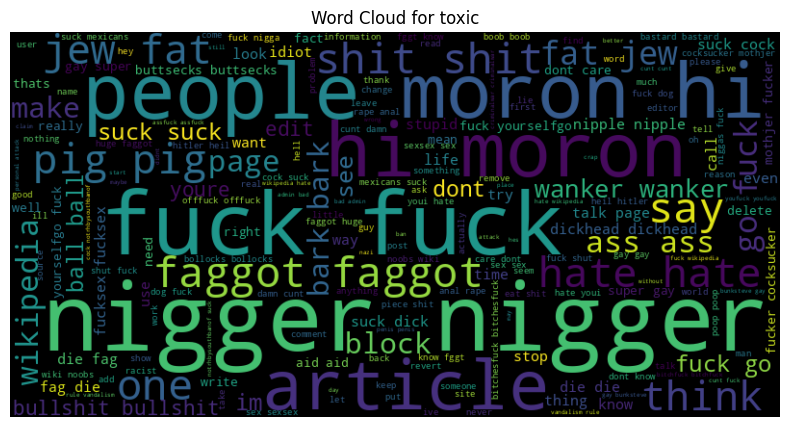

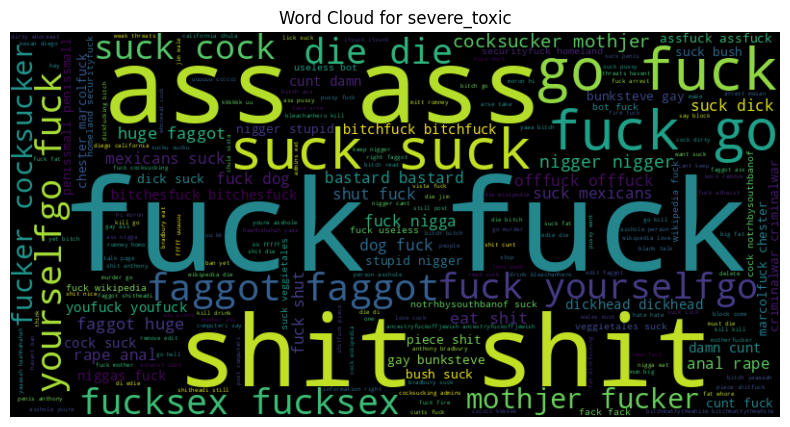

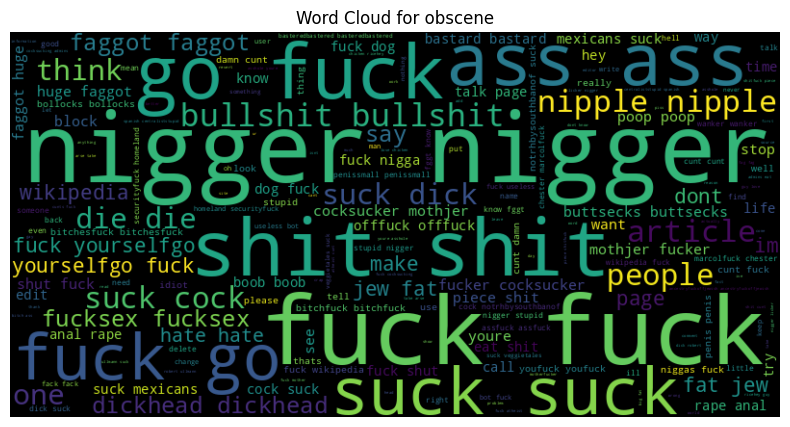

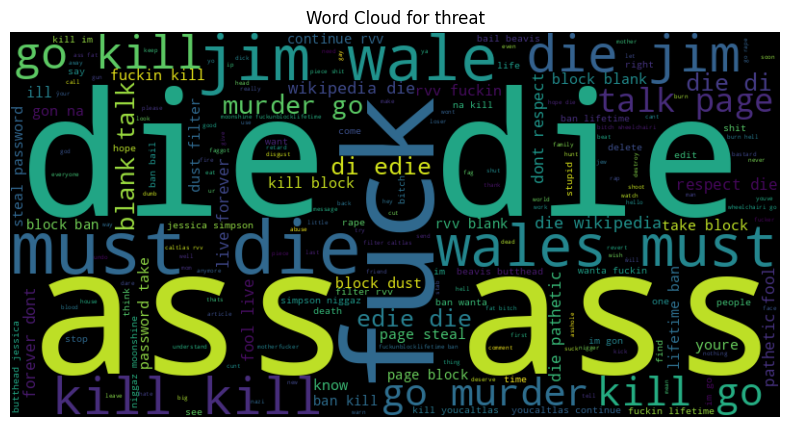

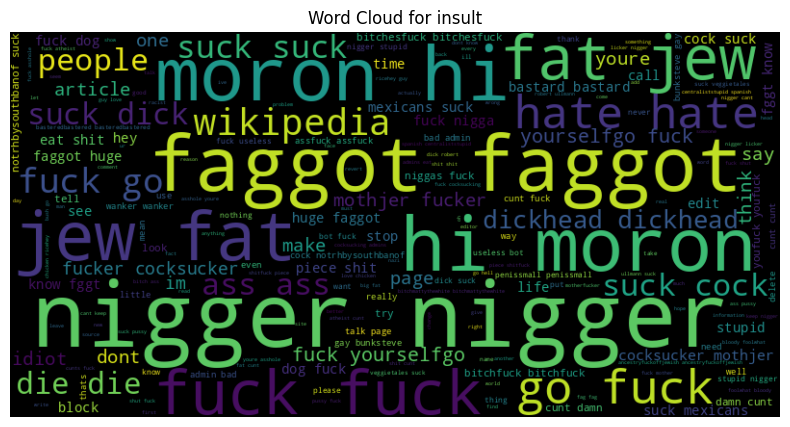

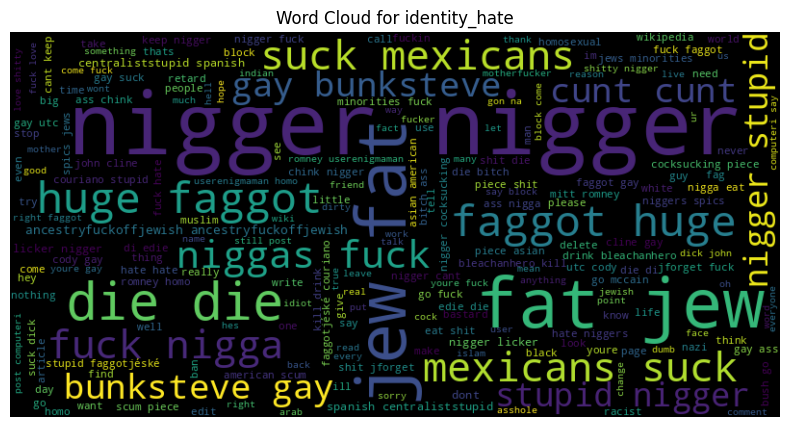

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of columns to generate word clouds for
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for column in columns:
    df_1 = df[df[column] == 1]
    text = ' '.join(df_1['tokens'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black')

    # Generate a word cloud
    wordcloud.generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {column}')
    plt.axis("off")
    plt.show()


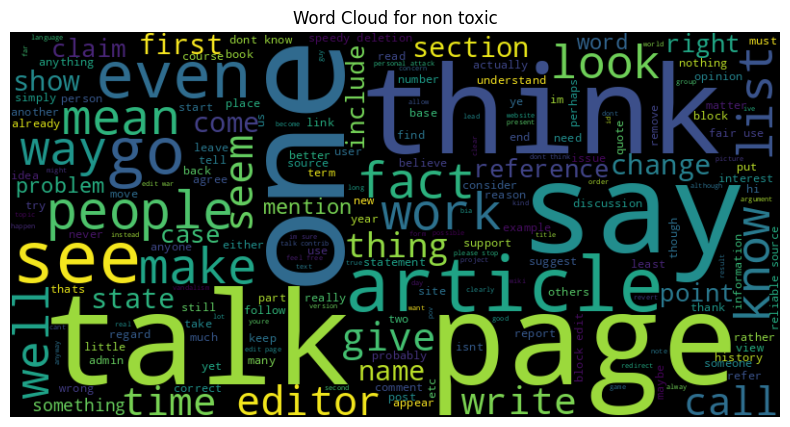

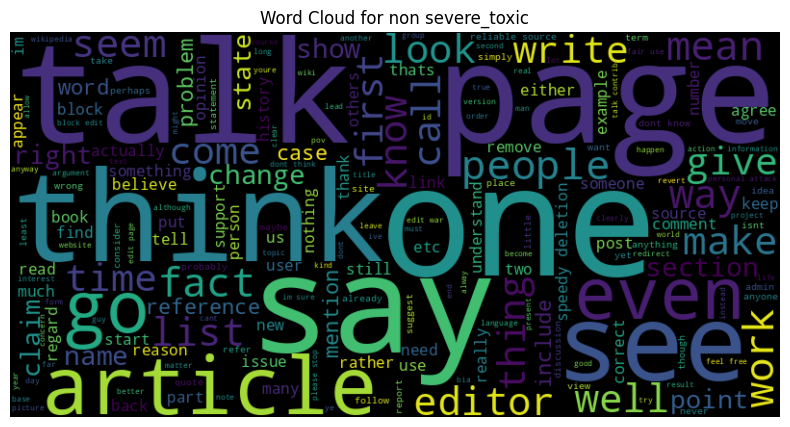

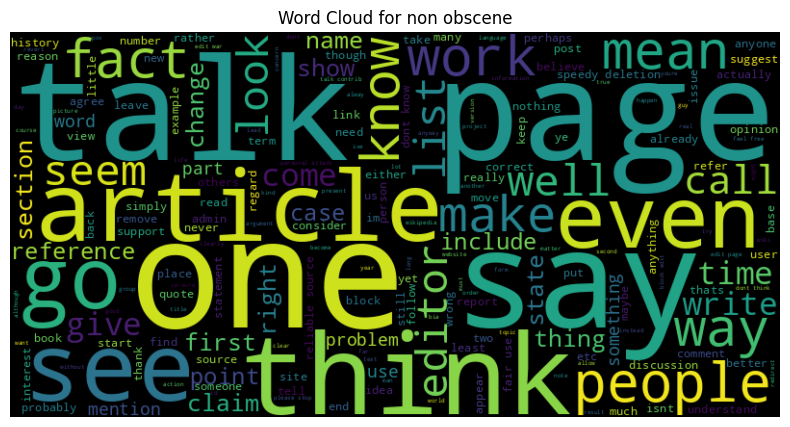

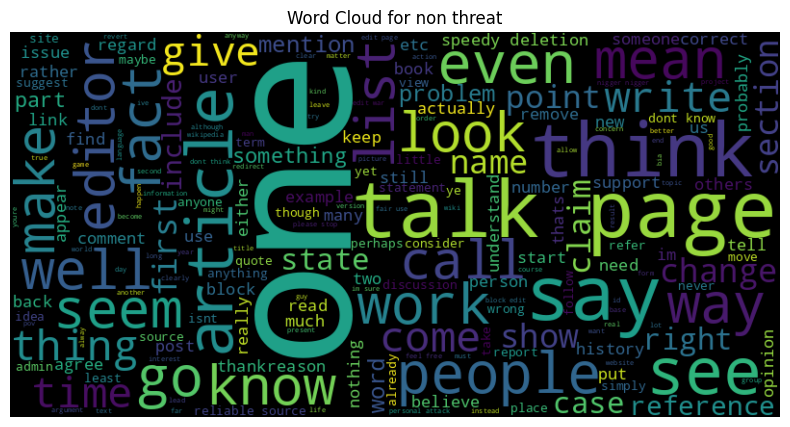

KeyboardInterrupt: 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of columns to generate word clouds for
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for column in columns:
    df_1 = df[df[column] == 0]
    text = ' '.join(df_1['tokens'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black')

    # Generate a word cloud
    wordcloud.generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for non {column}')
    plt.axis("off")
    plt.show()

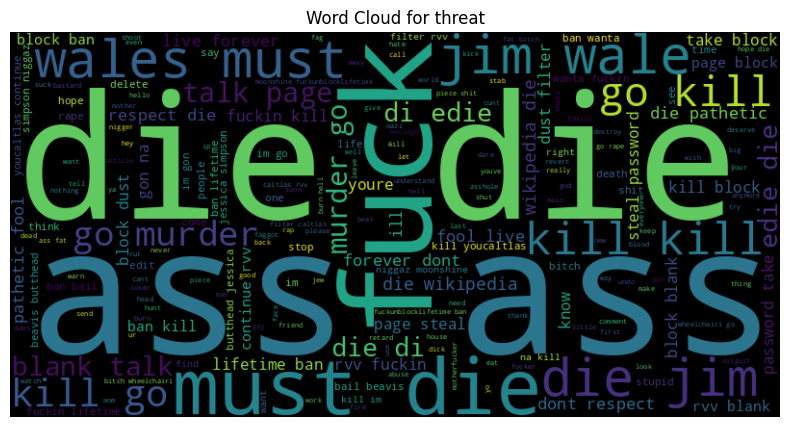

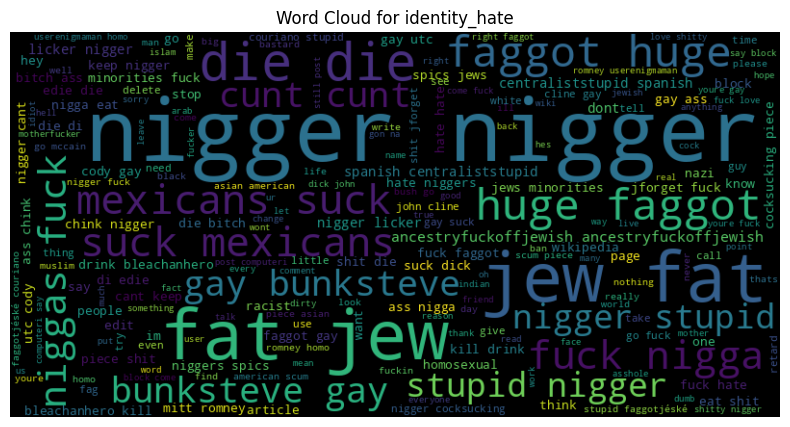

Top 100 words for 'threat' column: {'ass ass': 1.0, 'die die': 0.93952802359882, 'fuck': 0.41150442477876104, 'must die': 0.2345132743362832, 'jim wale': 0.23303834808259588, 'wales must': 0.23008849557522124, 'die jim': 0.23008849557522124, 'kill kill': 0.22418879056047197, 'go kill': 0.19321533923303835, 'kill go': 0.15486725663716813, 'go murder': 0.1504424778761062, 'talk page': 0.14896755162241887, 'murder go': 0.14601769911504425, 'blank talk': 0.13864306784660768, 'die di': 0.13274336283185842, 'di edie': 0.13274336283185842, 'edie die': 0.13274336283185842, 'die wikipedia': 0.13126843657817108, 'wikipedia die': 0.12979351032448377, 'live forever': 0.11209439528023599, 'forever dont': 0.11209439528023599, 'dont respect': 0.11209439528023599, 'respect die': 0.11209439528023599, 'die pathetic': 0.11209439528023599, 'pathetic fool': 0.10766961651917405, 'fool live': 0.10324483775811209, 'lifetime ban': 0.0855457227138643, 'ill': 0.08112094395280237, 'fuckin kill': 0.079646017699115

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dictionary to store top 100 words for 'threat' column
top_words_threat = {}

# Generate word cloud and store top words for 'threat' column
df_threat = df[df['threat'] == 1]
text_threat = ' '.join(df_threat['tokens'])
wordcloud_threat = WordCloud(width=800, height=400, background_color='black')
wordcloud_threat.generate(text_threat)
word_frequencies_threat = wordcloud_threat.words_
sorted_word_frequencies_threat = sorted(word_frequencies_threat.items(), key=lambda x: x[1], reverse=True)
top_words_threat = dict(sorted_word_frequencies_threat[:100])

# Display the word cloud for 'threat' column
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_threat, interpolation='bilinear')
plt.title('Word Cloud for threat')
plt.axis("off")
plt.show()

# Dictionary to store top 100 words for 'identity_hate' column
top_words_identity_hate = {}

# Generate word cloud and store top words for 'identity_hate' column
df_identity_hate = df[df['identity_hate'] == 1]
text_identity_hate = ' '.join(df_identity_hate['tokens'])
wordcloud_identity_hate = WordCloud(width=800, height=400, background_color='black')
wordcloud_identity_hate.generate(text_identity_hate)
word_frequencies_identity_hate = wordcloud_identity_hate.words_
sorted_word_frequencies_identity_hate = sorted(word_frequencies_identity_hate.items(), key=lambda x: x[1], reverse=True)
top_words_identity_hate = dict(sorted_word_frequencies_identity_hate[:100])

# Display the word cloud for 'identity_hate' column
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_identity_hate, interpolation='bilinear')
plt.title('Word Cloud for identity_hate')
plt.axis("off")
plt.show()

# Print the dictionaries containing top 100 words for each column
print("Top 100 words for 'threat' column:", top_words_threat)
print("Top 100 words for 'identity_hate' column:", top_words_identity_hate)


In [ ]:
X = df['tokens']
y = df.iloc[: , [1]]
y = y.to_numpy()
y_ = df.iloc[: , 1:7]

print( y_.iloc[:])
y_ = y_.to_numpy()

print(X.values)

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]
['explanation edit make username hardcore metallica fan revert werent vandalisms closure gas vote new york dolls fac please dont remove template talk page si

In [ ]:
y_col = y_[:, [3]]

# Get the unique values and their counts
unique_values, counts = np.unique(y_col, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 157093
Value: 1, Count: 2478


In [ ]:
y_col = y_[:, [5]]

# Get the unique values and their counts
unique_values, counts = np.unique(y_col, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 156177
Value: 1, Count: 3394


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = X.values

tfidf_vectorizer = TfidfVectorizer(use_idf=True)

tfidf_matrix   = tfidf_vectorizer.fit_transform(text_data)



In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

x_trainNB, x_testNB,y_trainNB, y_testNB = train_test_split(tfidf_matrix , y ,test_size =0.2 , random_state =42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {matrix}')


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n {report}')


Using LSTM


In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils import to_categorical
from keras.layers import SpatialDropout1D

In [ ]:
text = X.values

In [ ]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM  = 32

tokenizer = Tokenizer(num_words = MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True )
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index
print(len(word_index))

206702


In [ ]:
sequences = tokenizer.texts_to_sequences(text)
data = pad_sequences(sequences ,maxlen= MAX_SEQUENCE_LENGTH)
print(data.shape)

(159571, 150)


In [ ]:
print(data[63]) # random data value

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0   851  2568   105    49     8    91
  1970   600   851  2568  1661  2282  1639   185  1014  1087   163 23454
  1639   166  2568    20    27    91  2568  2273   597   431    82   851
  2568   851  1130   517  1014  1087    82   851  1688    76   543     8
   119  7029  1639   588  4075  2880   330  8064   166   195   668    90
   330  8064   493    94  9299  1555    28    82   419  2568   661  1014
  1087  1868   318  2568  2273     8    91   431   658   111  2986  1688
  2273   107  7207     5  1524    96]


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(data, y_ ,test_size =0.2 , random_state =42)

In [ ]:

from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding
from keras.models import Sequential
from keras.layers import LSTM


In [ ]:


class_weights1 = class_weight.compute_class_weight('balanced', classes=np.unique(y_train[:, 3]), y=y_train[:, 3])

# Compute class weights for class "identity_hate" (5th column)
class_weights2 = class_weight.compute_class_weight('balanced', classes=np.unique(y_train[:, 5]), y=y_train[:, 5])

# Create dictionaries mapping class indices to class weights for each class
class_weight_dict1 = {0: class_weights1[0], 1: class_weights1[1]}  # Class weights for "threat"
class_weight_dict2 = {0: class_weights2[0], 1: class_weights2[1]}  # Class weights for "identity_hate"


print("Class weights for class 'threat':", class_weight_dict1)
print("Class weights for class 'identity_hate':", class_weight_dict2)


Class weights for class 'threat': {0: 0.5015874013767957, 1: 157.990099009901}
Class weights for class 'identity_hate': {0: 0.5043897427792485, 1: 57.45094509450945}


In [ ]:
from keras.layers import Dropout, BatchNormalization

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(Bidirectional(LSTM(32, activation="tanh")))
 # Dropout regularization

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))  # Dropout regularization

model.add(Dense(256, activation="relu"))
 # Dropout regularization

model.add(Dense(128, activation="relu"))

model.add(Dense(6, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          1600000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
print("Shape of data:", data.shape)
print("Shape of labels:", y_.shape)


Shape of data: (159571, 150)
Shape of labels: (159571, 6)


In [ ]:
print(y_)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [ ]:
from keras.callbacks import EarlyStopping

epochs = 1  # Increase the number of epochs
batch_size = 64

callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

# Print input data shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    )

x_train shape: (127656, 150)
y_train shape: (127656, 6)
1796/1796 [==============================] - 258s 143ms/step - loss: 0.0461 - accuracy: 0.9802 - val_loss: 0.0654 - val_accuracy: 0.9892


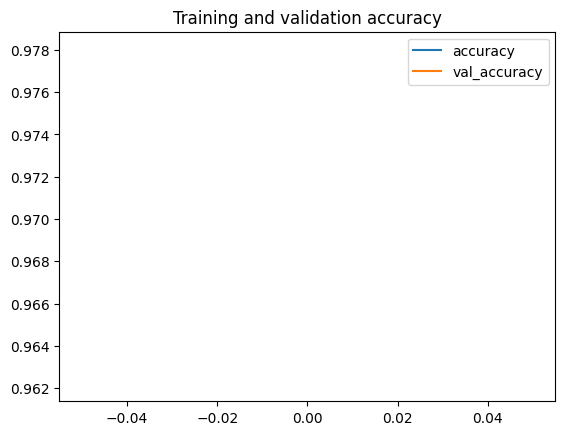

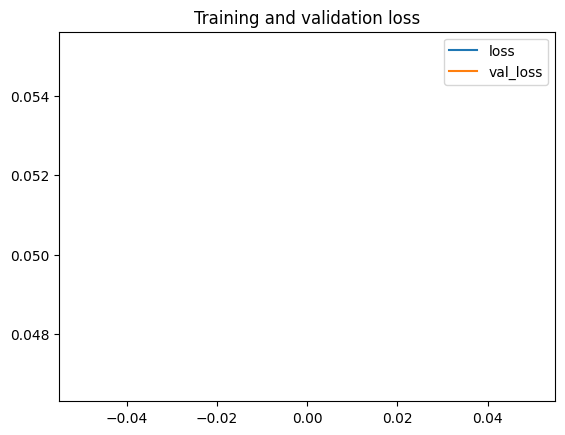

In [ ]:
import pandas as pd

# Assuming history.history is a dictionary containing your data
history_df = pd.DataFrame(history.history)

# Plotting accuracy
history_df[['accuracy', 'val_accuracy']].plot(kind='line')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plotting loss
history_df[['loss', 'val_loss']].plot(kind='line')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
print(x_test.shape,y_test.shape)

(31915, 150) (31915, 6)


In [ ]:
import numpy as np

# Generate predictions
predictions = model.predict(x_test)

# Apply threshold
threshold = 0.5
predictions = np.where(predictions > threshold, 1, 0)



998/998 [==============================] - 24s 24ms/step


In [ ]:
print(predictions.shape)

(31915, 6)


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(f'Classification Report:\n {report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.61      0.73      3056
           1       0.64      0.02      0.04       321
           2       0.88      0.68      0.77      1715
           3       0.87      0.84      0.86       410
           4       0.80      0.45      0.58      1614
           5       0.89      0.59      0.71       629

   micro avg       0.88      0.58      0.70      7745
   macro avg       0.83      0.53      0.61      7745
weighted avg       0.87      0.58      0.68      7745
 samples avg       0.06      0.06      0.06      7745



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y_test, predictions)
print('Test accuracy:', accuracy)


Test accuracy: 0.9151496161679461


In [ ]:
for i in range(len(columns)):
  accuracy = accuracy_score(y_test[: , [i]], predictions[: , [i]])
  print(f'Test accuracy: {columns[i]}', accuracy)


Test accuracy: toxic 0.95729280902397
Test accuracy: severe_toxic 0.9900360332132226
Test accuracy: obscene 0.9778787404041986
Test accuracy: threat 0.9963653454488485
Test accuracy: insult 0.9665047783174056
Test accuracy: identity_hate 0.9905060316465611


In [ ]:

for i in range(len(columns)):
  report = classification_report(y_test[: , [i]], predictions[: , [i]])
  print(f'Classification Report for class {columns[i]}:\n {report}')

Classification Report for class toxic:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.91      0.61      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.94      0.80      0.85     31915
weighted avg       0.96      0.96      0.95     31915

Classification Report for class severe_toxic:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     31594
           1       0.64      0.02      0.04       321

    accuracy                           0.99     31915
   macro avg       0.81      0.51      0.52     31915
weighted avg       0.99      0.99      0.99     31915

Classification Report for class obscene:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     30200
           1       0.88      0.68      0.77      1715

    accuracy                           0.98     31915

In [ ]:
user_text = input("Enter text to classify: ")
user_text = process_text(user_text)
user_sequences = tokenizer.texts_to_sequences([user_text])  # Convert input text to a list containing a single sequence
user_data = pad_sequences(user_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Make predictions using the model
user_predictions = model.predict(user_data).ravel()>0.5

columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Print classification scores for each class
print("Classification scores for each class:")
for i in range(len(columns)):
  print(f'{columns[i]} : {user_predictions[i]}')


Enter text to classify: you mexican nigger
1/1 [==============================] - 0s 44ms/step
Classification scores for each class:
toxic : True
severe_toxic : False
obscene : False
threat : False
insult : False
identity_hate : False


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test[: , [0]], predictions[0])
print(f'Confusion Matrix:\n {matrix}')

ValueError: Found input variables with inconsistent numbers of samples: [31915, 6]